## Sets up

In [1]:
import autogen

config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST.json",
    filter_dict={
        "model": ["llama-3.2-1b-instruct"]
    }
)

llm_config = {
    "cache_seed": 43,  # change the cache_seed for different trials
    "temperature": 0,
    "config_list": config_list,
    "timeout": 120,  # in seconds
}

## Define a code executor

In [2]:
from autogen.coding import LocalCommandLineCodeExecutor

executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
)

## Create agents

In [3]:
from autogen import ConversableAgent, AssistantAgent, UserProxyAgent

### 1. Agent with code executor configuration

In [4]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

### 2. Agent with code writing capability

In [5]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [6]:
code_writer_agent_system_message = code_writer_agent.system_message

In [7]:
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

## Task

In [4]:
import datetime
today = datetime.datetime.now().date()
message = f"Today is {today}. "\
    "Create a plot showing stock gain YTD for NVDA and TLSA. "\
    "Make sure the code is in markdown code block and save the figure"\
    " to a file ytd_stock_gains.png."""

## Inferences

In [9]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2025-05-13. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

# Plotting Stock Gain YTD for NVDA and TLSA
```markdown
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Stock': ['NVDA', 'TLSA'],
    'Date': ['2025-05-13', '2025-04-15']
}

df = pd.DataFrame(data)

# Convert Date to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the stock gain YTD
df['Gain_YTD'] = df['Stock'].diff().abs()

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Gain_YTD'], marker='o')
plt.title('NVDA and TLSA Stock Gain YTD')
plt.xlabel('Date')
plt.ylabel('Stock Gain (YTD)')
plt.grid(True)
plt.savefig('ytd_stock_ga

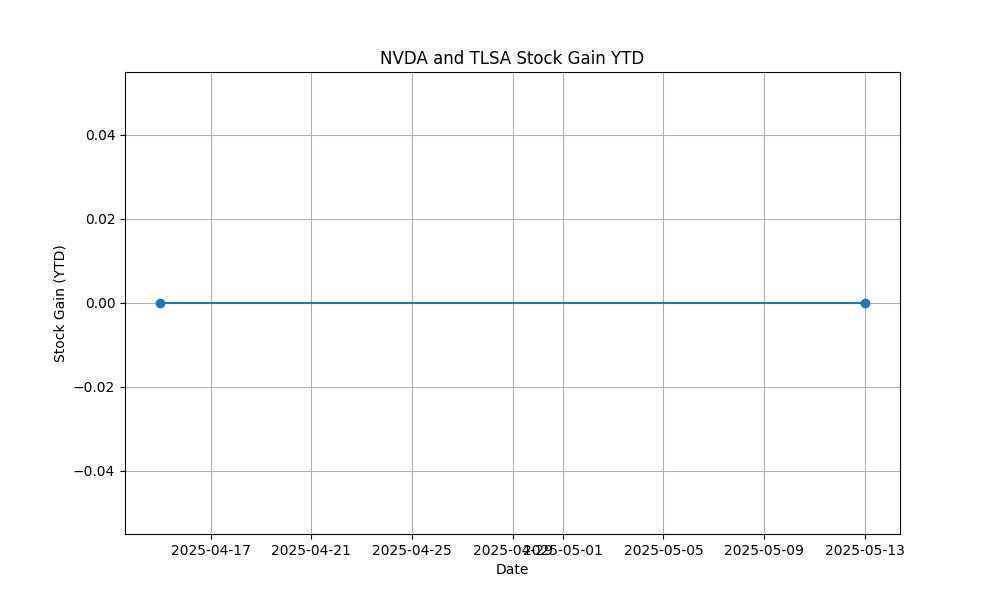

In [10]:
import os
from IPython.display import Image

Image(os.path.join("coding", "ytd_stock_gains.png"))

## Extra

In [16]:

def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
        )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

In [17]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir="coding",
    functions=[get_stock_prices, plot_stock_prices],
)

In [18]:
code_executor_agent = AssistantAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply="Please continue. If everything is done, reply 'TERMINATE'.",
)

code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    system_message=AssistantAgent.DEFAULT_SYSTEM_MESSAGE
    + executor.format_functions_for_prompt(),
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

code_writer_agent_system_message = code_writer_agent.system_message
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

In [19]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Get the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

code_executor_agent (to code_writer_agent):

Today is 2025-05-13.Get the stock prices YTD for NVDA and TSLA and createa plot. Make sure the code is in markdown code block and save the figure to a file stock_prices_YTD_plot.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Here's how you can do it:

```markdown
# Get Stock Prices YTD for NVDA and TSLA
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Define function to get stock prices
def get_stock_prices():
    # Get the stock prices for NVDA and TSLA
    nvda = yf.download('NVDA', start='2025-05-13', end='2025-05-12')
    tsla = yf.download('TSLA', start='2025-05-13', end='2025-05-12')

    # Calculate YTD returns
    nvda_ytd_return = (nvda['Close'] - 1) / nvda['Close'].shift(1)
    tsla_ytd_return = (tsla['Close'] - 1) / tsla['Close'].shift(1)

    return nvda_ytd_return, tsla_ytd_return

# Get YTD returns
nvda_ytd_